In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

In [2]:
def SurviveDistrib(df, column):
    temp_df = df.groupby(column).agg({'PassengerId':'count'}).rename(columns={'PassengerId':'PassangerCount'})
    temp_df['Survived'] = df[df.Survived == 1].groupby(column)\
        .agg({'PassengerId':'count'}).PassengerId
    temp_df['PercentOfSurvived'] = round(temp_df.Survived / temp_df.PassangerCount * 100)
    return temp_df

In [4]:
test_df = pd.read_csv('/Users/artemarhipov/titanic/test.csv')

In [5]:
df = pd.read_csv('/Users/artemarhipov/titanic/train.csv')

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Observing

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Survived

In [8]:
temp_df = df.groupby('Survived').agg({'PassengerId':'count'}).rename(columns={'PassengerId':'PassangerCount'})
temp_df['Percent'] = round((temp_df.PassangerCount / df.shape[0] * 100))
temp_df

,PassangerCount,Percent
Survived,,
0,549,62.0
1,342,38.0


### Pclass

In [9]:
temp_df = df.groupby('Pclass').agg({'PassengerId':'count'}).rename(columns={'PassengerId':'PassangerCount'})
temp_df['Percent'] = round((temp_df.PassangerCount / df.shape[0] * 100))
temp_df

,PassangerCount,Percent
Pclass,,
1,216,24.0
2,184,21.0
3,491,55.0


In [10]:
SurviveDistrib(df, 'Pclass')

,PassangerCount,Survived,PercentOfSurvived
Pclass,,,
1,216,136,63.0
2,184,87,47.0
3,491,119,24.0


### Name

In [11]:
tegs = []
survived = []
for i in range(df.shape[0]):
    p1 = df.iloc[i].Name.find(', ')
    p2 = df.iloc[i].Name.find('.')
    tegs.append(df.iloc[i].Name[p1+2:p2])
    survived.append(df.iloc[i].Survived)

temp_df = pd.DataFrame()
temp_df['Teg'] = tegs
temp_df['Survived'] = survived
tegs_gr_df = temp_df.groupby('Teg').agg({'Survived':'count'}).rename(columns={'Survived':'PeopleCount'})
tegs_gr_df['SurvivedCount'] = temp_df.groupby('Teg').agg({'Survived':'sum'}).Survived
tegs_gr_df['SurvivedPercent'] = round(tegs_gr_df.SurvivedCount / tegs_gr_df.PeopleCount * 100)
tegs_gr_df.sort_values('SurvivedPercent', ascending=False)

,PeopleCount,SurvivedCount,SurvivedPercent
Teg,,,
the Countess,1,1,100.0
Mlle,2,2,100.0
Sir,1,1,100.0
Ms,1,1,100.0
Lady,1,1,100.0
Mme,1,1,100.0
Mrs,125,99,79.0
Miss,182,127,70.0
Master,40,23,57.0


##### perhaps, it makes sense to add a feature : "the percentage of survival", based on the abbreviation

### Sex

In [12]:
SurviveDistrib(df, 'Sex')

,PassangerCount,Survived,PercentOfSurvived
Sex,,,
female,314,233,74.0
male,577,109,19.0


### Age

<AxesSubplot:title={'center':'Age distribution'}, xlabel='Age'>

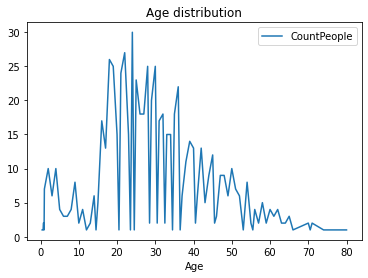

In [13]:
df.groupby('Age').agg({'PassengerId':'count'}).rename(columns={'PassengerId':'CountPeople'})\
.plot(title = 'Age distribution')

<AxesSubplot:title={'center':'Age distribution'}, xlabel='Age'>

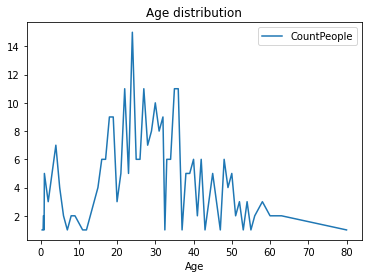

In [14]:
df[df.Survived == 1].groupby('Age').agg({'PassengerId':'count'}).rename(columns={'PassengerId':'CountPeople'})\
.plot(title = 'Age distribution')

<AxesSubplot:title={'center':'Age distribution'}, xlabel='Age'>

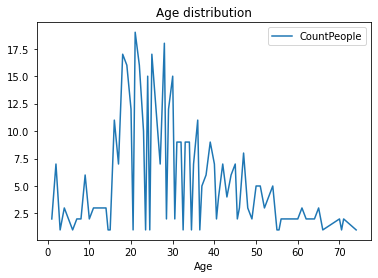

In [15]:
df[df.Survived == 0].groupby('Age').agg({'PassengerId':'count'}).rename(columns={'PassengerId':'CountPeople'})\
.plot(title = 'Age distribution')

In [16]:
df[df.Survived == 1].Age.describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
df[df.Survived ==0].Age.describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

In [18]:
stats.f_oneway(df[(df.Survived == 1) & (df.Age.notna())].Age, df[(df.Survived == 0) & (df.Age.notna())].Age)
#for means of n-ddistributions

F_onewayResult(statistic=4.271194933815904, pvalue=0.03912465401348333)

In [19]:
stats.kruskal(df[(df.Survived == 1) & (df.Age.notna())].Age, df[(df.Survived == 0) & (df.Age.notna())].Age)
# for medians

KruskalResult(statistic=1.970097978146391, pvalue=0.16043746252207006)

### SibSp

In [20]:
df.groupby('SibSp').agg({'PassengerId':'count'})

,PassengerId
SibSp,
0,608
1,209
2,28
3,16
4,18
5,5
8,7


In [21]:
SurviveDistrib(df,'SibSp')

,PassangerCount,Survived,PercentOfSurvived
SibSp,,,
0,608,210.0,35.0
1,209,112.0,54.0
2,28,13.0,46.0
3,16,4.0,25.0
4,18,3.0,17.0
5,5,NaN,NaN
8,7,NaN,NaN


In [22]:
df[df.SibSp == 5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S


In [23]:
df[df.SibSp == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


### Parch

In [24]:
SurviveDistrib(df, 'Parch')

,PassangerCount,Survived,PercentOfSurvived
Parch,,,
0,678,233.0,34.0
1,118,65.0,55.0
2,80,40.0,50.0
3,5,3.0,60.0
4,4,NaN,NaN
5,5,1.0,20.0
6,1,NaN,NaN


In [25]:
temp_df = df.copy()
temp_df['allfam'] = temp_df.Parch * temp_df.SibSp
SurviveDistrib(temp_df, 'allfam')
# may be good new feature

,PassangerCount,Survived,PercentOfSurvived
allfam,,,
0,749,280.0,37.0
1,57,34.0,60.0
2,26,18.0,69.0
3,10,1.0,10.0
4,16,2.0,12.0
5,3,1.0,33.0
6,9,3.0,33.0
8,9,3.0,33.0
10,5,NaN,NaN


### Fare

<AxesSubplot:title={'center':'Fare distribution'}, xlabel='Fare'>

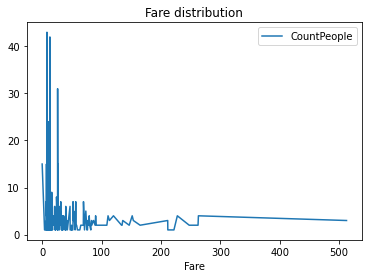

In [26]:
df.groupby('Fare').agg({'PassengerId':'count'}).rename(columns={'PassengerId':'CountPeople'})\
.plot(title = 'Fare distribution')

<AxesSubplot:title={'center':'Fare distribution'}, xlabel='Fare'>

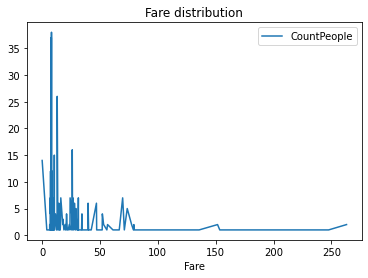

In [27]:
df[df.Survived == 0].groupby('Fare').agg({'PassengerId':'count'}).rename(columns={'PassengerId':'CountPeople'})\
.plot(title = 'Fare distribution')

<AxesSubplot:title={'center':'Fare distribution'}, xlabel='Fare'>

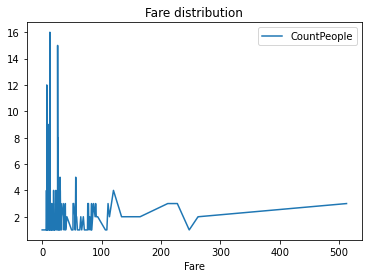

In [28]:
df[df.Survived == 1].groupby('Fare').agg({'PassengerId':'count'}).rename(columns={'PassengerId':'CountPeople'})\
.plot(title = 'Fare distribution')

### Cabin

In [29]:
cabins = []
survived = []
temp_df = df[df.Cabin.notna()][['Cabin', 'Survived']].reset_index()
for i in range(temp_df.shape[0]):
    cabins.append(temp_df.iloc[i].Cabin[0])
    survived.append(temp_df.iloc[i].Survived)
temp_df = pd.DataFrame()
temp_df['Cabin'] = cabins
temp_df['Survived'] = survived

In [30]:
temp_df.groupby('Cabin').agg({'Survived':'mean'}).sort_values('Survived')
# may be good new feature

,Survived
Cabin,
T,0.000000
A,0.466667
G,0.500000
C,0.593220
F,0.615385
B,0.744681
E,0.750000
D,0.757576


### Embarked

In [31]:
SurviveDistrib(df, 'Embarked')

,PassangerCount,Survived,PercentOfSurvived
Embarked,,,
C,168,93,55.0
Q,77,30,39.0
S,644,217,34.0


# Feature engineering

In [186]:
new_df = df.copy()

### On names

In [187]:
names = list(tegs_gr_df[tegs_gr_df.PeopleCount > 30].index)
perc = list(tegs_gr_df[tegs_gr_df.PeopleCount > 30].SurvivedPercent)
dictionary_names = {}
for i in range(len(names)):
    dictionary_names[names[i]] = perc[i]

In [188]:
dictionary_names

{'Master': 57.0, 'Miss': 70.0, 'Mr': 16.0, 'Mrs': 79.0}

In [189]:
tegs = []
for i in range(df.shape[0]):
    p1 = df.iloc[i].Name.find(', ')
    p2 = df.iloc[i].Name.find('.')
    tegs.append(df.iloc[i].Name[p1+2:p2])
new_df['AbrPercSurv'] = tegs
new_df['AbrPercSurv'] = new_df['AbrPercSurv'].map(dictionary_names)

In [190]:
new_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AbrPercSurv
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,16.0


### On Parch and SibSp

In [191]:
new_df['Family'] = new_df.Parch * new_df.SibSp

In [192]:
new_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AbrPercSurv,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,16.0,0


### On Cabin

In [193]:
cabins = []
for cabin in new_df.Cabin.apply(str):
    cabins.append(cabin[0])
new_df['CabinType'] = cabins
new_df['CabinType'] = new_df['CabinType'].replace('n', np.nan)

In [194]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AbrPercSurv,Family,CabinType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,16.0,0,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,79.0,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,70.0,0,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,79.0,0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,16.0,0,NaN


## Replacing str-values to numeric

In [195]:
new_df.Sex = new_df.Sex.map({'male':1, 'female':0})
new_df.Embarked = new_df.Embarked.map({'S':0, 'C':1, 'Q':2})
new_df.CabinType = new_df.CabinType.map({'C':0, 'E':1, 'G':2, 'D':3, 'A':4, 'B':5, 'F':6, 'T':7})

## Droping not-infomative features

In [196]:
new_df = new_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [197]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('Survived', axis = 1), \
                                                    new_df.Survived, test_size=0.2, random_state=23)

In [198]:
new_df = X_train.copy()
new_df['Survived'] = y_train

## Eliminating NaN-values

In [199]:
new_df[new_df.Survived == 0].isna().sum()

Pclass           0
Sex              0
Age             95
SibSp            0
Parch            0
Fare             0
Embarked         0
AbrPercSurv     12
Family           0
CabinType      379
Survived         0
dtype: int64

In [200]:
new_df[new_df.Survived == 1].isna().sum()

Pclass           0
Sex              0
Age             40
SibSp            0
Parch            0
Fare             0
Embarked         1
AbrPercSurv     10
Family           0
CabinType      169
Survived         0
dtype: int64

#### Let's fiil NaN in Age with mean class values and in CabinType with class modes
#### AbrPercSurv will filed by mean values too

In [201]:
mean_filled_df = new_df.copy()

mean_filled_df.loc[(mean_filled_df.Survived == 1) & (mean_filled_df.Age.isna()), 'Age'] = \
mean_filled_df[mean_filled_df.Survived == 1].Age.mean()  

mean_filled_df.loc[(mean_filled_df.Survived == 0) & (mean_filled_df.Age.isna()), 'Age'] = \
mean_filled_df[mean_filled_df.Survived == 0].Age.mean() 


mean_filled_df.loc[(mean_filled_df.Survived == 1) & (mean_filled_df.CabinType.isna()), 'CabinType'] = \
mean_filled_df[mean_filled_df.Survived == 1].CabinType.mode()[0]  

mean_filled_df.loc[(mean_filled_df.Survived == 0) & (mean_filled_df.CabinType.isna()), 'CabinType'] = \
mean_filled_df[mean_filled_df.Survived == 0].CabinType.mode()[0]


mean_filled_df.loc[(mean_filled_df.Survived == 1) & (mean_filled_df.AbrPercSurv.isna()), 'AbrPercSurv'] = \
mean_filled_df[mean_filled_df.Survived == 1].AbrPercSurv.mean()

mean_filled_df.loc[(mean_filled_df.Survived == 0) & (mean_filled_df.AbrPercSurv.isna()), 'AbrPercSurv'] = \
mean_filled_df[mean_filled_df.Survived == 0].AbrPercSurv.mean()


mean_filled_df.loc[(mean_filled_df.Survived == 1) & (mean_filled_df.Embarked.isna()), 'Embarked'] = \
mean_filled_df[mean_filled_df.Survived == 1].Embarked.mode()[0]

mean_filled_df.loc[(mean_filled_df.Survived == 0) & (mean_filled_df.Embarked.isna()), 'Embarked'] = \
mean_filled_df[mean_filled_df.Survived == 0].Embarked.mode()[0]

## Eliminating classes imbalance
#### We will use ADASYN, like most powerfull tool

In [202]:
from imblearn.over_sampling import ADASYN

In [203]:
ada = ADASYN(random_state=23)

In [204]:
X_new_ada, y_new_ada = ada.fit_resample(new_df.dropna().drop('Survived', axis = 1), new_df.dropna().Survived)


X_train_new_ada, X_validation_new_ada, y_train_new_ada, y_validation_new_ada =\
    train_test_split(X_new_ada, y_new_ada, train_size=0.8, random_state=23)

In [205]:
X_mean_ada, y_mean_ada = ada.fit_resample(mean_filled_df.drop('Survived', axis = 1), mean_filled_df.Survived)


X_train_mean_ada, X_validation_mean_ada, y_train_mean_ada, y_validation_mean_ada =\
    train_test_split(X_mean_ada, y_mean_ada, train_size=0.8, random_state=23)

## Model training

In [206]:
from catboost import CatBoostClassifier
from sklearn.metrics import *

#### Now we have 4 different frames, let's test it on 2 models: model1 and model2

In [219]:
model1 = CatBoostClassifier(custom_loss=['AUC', 'Accuracy'], eval_metric='AUC')

In [220]:
metric = ['DataFrame','Precision', 'Recall', 'AUC', 'F1', 'Accuracy']
model1_metrics_df = pd.DataFrame(columns = metric)

In [221]:
#### 1. new_df
X_train_new, X_validation_new, y_train_new, y_validation_new =\
    train_test_split(new_df.drop('Survived', axis = 1), \
                     new_df.Survived, train_size=0.8, random_state=23)


model1.fit(X_train_new,
    y_train_new,
    use_best_model=True,
    eval_set=(X_validation_new, y_validation_new),
    verbose=False,
    plot=False,
    early_stopping_rounds=1000)


model1_metrics_df = model1_metrics_df.append({'DataFrame':'new_df',\
                          'Precision':precision_score(model1.predict(X_test), y_test),\
                          'Recall':recall_score(model1.predict(X_test), y_test),\
                          'AUC':roc_auc_score(model1.predict(X_test), y_test),\
                          'F1':f1_score(model1.predict(X_test), y_test),\
                          'Accuracy':accuracy_score(model1.predict(X_test), y_test)},\
                         ignore_index=True)

In [222]:
#### 2. mean_filled_df
X_train_mean, X_validation_mean, y_train_mean, y_validation_mean =\
    train_test_split(mean_filled_df.drop('Survived', axis = 1), \
                     mean_filled_df.Survived, train_size=0.8, random_state=23)


model1.fit(X_train_mean,
    y_train_mean,
    use_best_model=True,
    eval_set=(X_validation_mean, y_validation_mean),
    verbose=False,
    plot=False,
    early_stopping_rounds=1000)


model1_metrics_df = model1_metrics_df.append({'DataFrame':'mean_filled_df',\
                          'Precision':precision_score(model1.predict(X_test), y_test),\
                          'Recall':recall_score(model1.predict(X_test), y_test),\
                          'AUC':roc_auc_score(model1.predict(X_test), y_test),\
                          'F1':f1_score(model1.predict(X_test), y_test),\
                          'Accuracy':accuracy_score(model1.predict(X_test), y_test)},\
                         ignore_index=True)

In [224]:
#### 3. train_new_ada_df


model1.fit(X_train_new_ada,
    y_train_new_ada,
    use_best_model=True,
    eval_set=(X_validation_new_ada, y_validation_new_ada),
    verbose=False,
    plot=False,
    early_stopping_rounds=1000)


model1_metrics_df = model1_metrics_df.append({'DataFrame':'train_new_ada_df',\
                          'Precision':precision_score(model1.predict(X_test), y_test),\
                          'Recall':recall_score(model1.predict(X_test), y_test),\
                          'AUC':roc_auc_score(model1.predict(X_test), y_test),\
                          'F1':f1_score(model1.predict(X_test), y_test),\
                          'Accuracy':accuracy_score(model1.predict(X_test), y_test)},\
                         ignore_index=True)

In [226]:
#### 4. train_mean_ada_df


model1.fit(X_train_mean_ada,
    y_train_mean_ada,
    use_best_model=True,
    eval_set=(X_validation_mean_ada, y_validation_mean_ada),
    verbose=False,
    plot=False,
    early_stopping_rounds=1000)


model1_metrics_df = model1_metrics_df.append({'DataFrame':'train_new_ada_df',\
                          'Precision':precision_score(model1.predict(X_test), y_test),\
                          'Recall':recall_score(model1.predict(X_test), y_test),\
                          'AUC':roc_auc_score(model1.predict(X_test), y_test),\
                          'F1':f1_score(model1.predict(X_test), y_test),\
                          'Accuracy':accuracy_score(model1.predict(X_test), y_test)},\
                         ignore_index=True)

In [227]:
model1_metrics_df

,DataFrame,Precision,Recall,AUC,F1,Accuracy
0,new_df,0.687500,0.814815,0.827407,0.745763,0.832402
1,mean_filled_df,0.640625,0.732143,0.772575,0.683333,0.787709
2,train_new_ada_df,0.500000,0.780488,0.774302,0.609524,0.770950
3,train_new_ada_df,0.781250,0.549451,0.695180,0.645161,0.692737


In [249]:
model2 = CatBoostClassifier(iterations=10000,
                         learning_rate=0.001,
                         loss_function='Logloss',
                         use_best_model=True,
                         verbose=False,
                         custom_loss=['AUC', 'Accuracy'],
                         custom_metric=None,
                         boosting_type=None,
                         bootstrap_type=None,
                         max_depth=None,
                         n_estimators=None,
                         random_state=None,
                         #cat_features=cat_features,
                         )

In [260]:
model2_metrics_df = pd.DataFrame(columns = metric)

In [261]:
#### 1. new_df


model2.fit(X_train_new,
    y_train_new,
    use_best_model=True,
    eval_set=(X_validation_new, y_validation_new),
    verbose=False,
    plot=True)


model2_metrics_df = model2_metrics_df.append({'DataFrame':'new_df',\
                          'Precision':precision_score(model2.predict(X_test), y_test),\
                          'Recall':recall_score(model2.predict(X_test), y_test),\
                          'AUC':roc_auc_score(model2.predict(X_test), y_test),\
                          'F1':f1_score(model2.predict(X_test), y_test),\
                          'Accuracy':accuracy_score(model2.predict(X_test), y_test)},\
                         ignore_index=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [262]:
#### 2. mean_filled_df


model2.fit(X_train_mean,
    y_train_mean,
    use_best_model=True,
    eval_set=(X_validation_mean, y_validation_mean),
    verbose=False,
    plot=True,
    early_stopping_rounds=1000)


model2_metrics_df = model2_metrics_df.append({'DataFrame':'mean_filled_df',\
                          'Precision':precision_score(model2.predict(X_test), y_test),\
                          'Recall':recall_score(model2.predict(X_test), y_test),\
                          'AUC':roc_auc_score(model2.predict(X_test), y_test),\
                          'F1':f1_score(model2.predict(X_test), y_test),\
                          'Accuracy':accuracy_score(model2.predict(X_test), y_test)},\
                         ignore_index=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [263]:
#### 3. train_new_ada_df


model2.fit(X_train_new_ada,
    y_train_new_ada,
    use_best_model=True,
    eval_set=(X_validation_new_ada, y_validation_new_ada),
    verbose=False,
    plot=True,
    early_stopping_rounds=1000)


model2_metrics_df = model2_metrics_df.append({'DataFrame':'train_new_ada_df',\
                          'Precision':precision_score(model2.predict(X_test), y_test),\
                          'Recall':recall_score(model2.predict(X_test), y_test),\
                          'AUC':roc_auc_score(model2.predict(X_test), y_test),\
                          'F1':f1_score(model2.predict(X_test), y_test),\
                          'Accuracy':accuracy_score(model2.predict(X_test), y_test)},\
                         ignore_index=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [264]:
#### 4. train_mean_ada_df


model2.fit(X_train_mean_ada,
    y_train_mean_ada,
    use_best_model=True,
    eval_set=(X_validation_mean_ada, y_validation_mean_ada),
    verbose=False,
    plot=True,
    early_stopping_rounds=1000)


model2_metrics_df = model2_metrics_df.append({'DataFrame':'train_mean_ada_df',\
                          'Precision':precision_score(model2.predict(X_test), y_test),\
                          'Recall':recall_score(model2.predict(X_test), y_test),\
                          'AUC':roc_auc_score(model2.predict(X_test), y_test),\
                          'F1':f1_score(model2.predict(X_test), y_test),\
                          'Accuracy':accuracy_score(model2.predict(X_test), y_test)},\
                         ignore_index=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [265]:
model2_metrics_df

,DataFrame,Precision,Recall,AUC,F1,Accuracy
0,new_df,0.609375,0.829787,0.820197,0.702703,0.815642
1,mean_filled_df,0.640625,0.694915,0.751624,0.666667,0.770950
2,train_new_ada_df,0.734375,0.382114,0.539271,0.502674,0.480447
3,train_mean_ada_df,0.750000,0.615385,0.728484,0.676056,0.743017


In [266]:
model1_metrics_df

,DataFrame,Precision,Recall,AUC,F1,Accuracy
0,new_df,0.687500,0.814815,0.827407,0.745763,0.832402
1,mean_filled_df,0.640625,0.732143,0.772575,0.683333,0.787709
2,train_new_ada_df,0.500000,0.780488,0.774302,0.609524,0.770950
3,train_new_ada_df,0.781250,0.549451,0.695180,0.645161,0.692737


#### model1 showed the best result on dataset "new_df"
#### Let's tune it!

In [267]:
model1 = CatBoostClassifier(custom_loss=['AUC', 'Accuracy'], eval_metric='AUC')

In [272]:
model1.fit(X_train_new,
    y_train_new,
    use_best_model=True,
    eval_set=(X_validation_new, y_validation_new),
    verbose=False,
    plot=True,
    early_stopping_rounds=1000)


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [276]:
tunned_model = CatBoostClassifier(iterations=10000,
                         learning_rate=0.01,
                         loss_function='Logloss',
                         use_best_model=True,
                         verbose=False,
                         custom_loss=['AUC', 'Accuracy', 'F1'],
                         eval_metric='Logloss',
                         early_stopping_rounds=500,
                        leaf_estimation_method='Newton')

tunned_model.fit(X_train_new,
    y_train_new,
    use_best_model=True,
    eval_set=(X_validation_new, y_validation_new),
    verbose=False,
    plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [279]:
print('model1')
print('Precision',precision_score(model1.predict(X_test), y_test))
print('Recall',recall_score(model1.predict(X_test), y_test))
print('AUC',roc_auc_score(model1.predict(X_test), y_test))
print('F1',f1_score(model1.predict(X_test), y_test))
print('Accuracy',accuracy_score(model1.predict(X_test), y_test))

model1
Precision 0.6875
Recall 0.8148148148148148
AUC 0.8274074074074074
F1 0.7457627118644067
Accuracy 0.8324022346368715


In [280]:
print('tunned_model')
print('Precision',precision_score(tunned_model.predict(X_test), y_test))
print('Recall',recall_score(tunned_model.predict(X_test), y_test))
print('AUC',roc_auc_score(tunned_model.predict(X_test), y_test))
print('F1',f1_score(tunned_model.predict(X_test), y_test))
print('Accuracy',accuracy_score(tunned_model.predict(X_test), y_test))

tunned_model
Precision 0.625
Recall 0.8333333333333334
AUC 0.8250636132315523
F1 0.7142857142857143
Accuracy 0.8212290502793296


#### model1 is still the best.....

#### Make Kaggle submission

In [294]:
new_test_df = test_df.copy()

In [295]:
names = list(tegs_gr_df[tegs_gr_df.PeopleCount > 30].index)
perc = list(tegs_gr_df[tegs_gr_df.PeopleCount > 30].SurvivedPercent)
dictionary_names = {}
for i in range(len(names)):
    dictionary_names[names[i]] = perc[i]

In [296]:
tegs = []
for i in range(new_test_df.shape[0]):
    p1 = new_test_df.iloc[i].Name.find(', ')
    p2 = new_test_df.iloc[i].Name.find('.')
    tegs.append(new_test_df.iloc[i].Name[p1+2:p2])
new_test_df['AbrPercSurv'] = tegs
new_test_df['AbrPercSurv'] = new_test_df['AbrPercSurv'].map(dictionary_names)

In [297]:
new_test_df['Family'] = new_test_df.Parch * new_test_df.SibSp

In [298]:
cabins = []
for cabin in new_test_df.Cabin.apply(str):
    cabins.append(cabin[0])
new_test_df['CabinType'] = cabins
new_test_df['CabinType'] = new_test_df['CabinType'].replace('n', np.nan)

In [299]:
new_test_df.Sex = new_test_df.Sex.map({'male':1, 'female':0})
new_test_df.Embarked = new_test_df.Embarked.map({'S':0, 'C':1, 'Q':2})
new_test_df.CabinType = new_test_df.CabinType.map({'C':0, 'E':1, 'G':2, 'D':3, 'A':4, 'B':5, 'F':6, 'T':7})

In [300]:
new_test_df = new_test_df.drop(['Name', 'Ticket', 'Cabin'], axis = 1)

In [304]:
submission_df = pd.DataFrame(index = new_test_df.PassengerId)
submission_df['Survived'] = model1.predict(new_test_df)

In [305]:
submission_df

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [306]:
submission_df.to_csv('/Users/artemarhipov/Downloads/titanic_submission.csv')

## score: Accuracy = 0.75598